In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [4]:
!ls

alphadat.pickle		      plot_alpha.py
alpha_plots.ipynb	      plot_conductances.ipynb
base3c			      plot.ipynb
base3d			      plot-pace.ipynb
base3t.txt		      PV_population_contrast_nl.svg
base.svg		      PV_population_contrast.png
code			      PV_population_contrast.svg
comp.eps		      raw
ContrastCurves.ipynb	      schematic.ipynb
data			      short_nl.txt
EB.ipynb		      srun
ex.svg			      SST_population_contrast.png
nl3t.txt		      SST_population_contrast.svg
nl_short.svg		      stats_base.txt
nl.svg			      stats_nonlin.txt
parameter_fits_base3t.pickle  stats_short_nonlin.txt
parameter_fits_nl3t.pickle    Untitled.ipynb


In [3]:
def get_data(simname,seed,stype,contrast):
    fname = f'data/{simname}/results_{seed}/{stype}_{contrast}_rec.pickle'
    with open(fname, 'rb') as f:
        dat = pickle.load(f)
        
    return dat

def get_data_d(simname,seed,stype,contrast):
    fname = f'data/{simname}/results_{seed}/{stype}_{contrast}_rec_distal.pickle'
    with open(fname, 'rb') as f:
        dat = pickle.load(f)
        
    return dat

def get_average_cond(dat):
    N = len(dat)
    g_in_ave = np.zeros(3099)
    g_ex_ave = np.zeros(3099)
    t=dat[0]['times']

#     fig, ax = plt.subplots()
    for ni in range(N):
        g_in_ave += dat[ni]['g_in']
        g_ex_ave += dat[ni]['g_ex']
#         ax.plot(t,dat[ni]['g_in'], c='tab:orange')
#         ax.plot(t,dat[ni]['g_ex'], c='tab:blue')

    g_in_ave = g_in_ave/N
    g_ex_ave = g_ex_ave/N
#     ax.set_xlim(950,1200)

    return t, g_ex_ave, g_in_ave

In [4]:
stype = 'SOM'
contrast = 0.1
fname = 'data/base3t_full/results_1/%s_%s_rec.pickle'%(stype, contrast)
with open(fname, 'rb') as f:
    dat = pickle.load(f)

In [5]:
dat[0]

{'g_ex': array([0.        , 0.        , 0.        , ..., 1.04816994, 0.8872567 ,
        0.75104658]),
 'g_in': array([ 0.        ,  0.        ,  0.        , ..., 20.40468754,
        19.40953919, 18.46292479]),
 'senders': array([17, 17, 17, ..., 17, 17, 17]),
 'times': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 3.097e+03, 3.098e+03,
        3.099e+03]),
 'V_m': array([-62.18754251, -62.69139243, -63.16274748, ..., -66.53228295,
        -67.13466444, -67.66274805])}

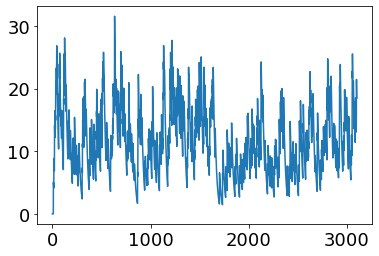

In [6]:
plt.plot(dat[0]['g_in'])

(950.0, 1200.0)

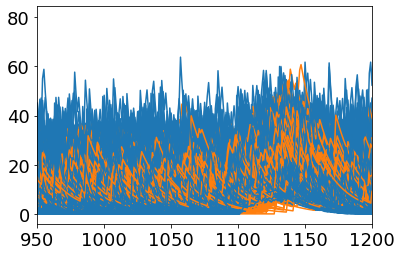

In [7]:
N = len(dat)
g_in_ave = np.zeros(3099)
g_ex_ave = np.zeros(3099)
t=dat[0]['times']

fig, ax = plt.subplots()
for ni in range(N):
    g_in_ave += dat[ni]['g_in']
    g_ex_ave += dat[ni]['g_ex']
    ax.plot(t,dat[ni]['g_in'], c='tab:orange')
    ax.plot(t,dat[ni]['g_ex'], c='tab:blue')
    
g_in_ave = g_in_ave/N
g_ex_ave = g_ex_ave/N
ax.set_xlim(950,1200)

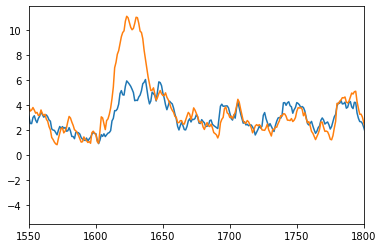

In [21]:

dat_SST = get_data('base3t_full', 3, 'SOM', 0.02)
dat_PV = get_data('base3t_full', 3, 'PV', 0.02)
t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)


plt.plot(t,g_in_pv-g_ex_pv)
plt.plot(t,g_in_sst-g_ex_sst)
# plt.plot(t,g_ex_pv)
# plt.plot(t,g_ex_sst)

plt.xlim(1550,1800)
plt.show()

In [4]:

dat_SST = get_data('control3t_full_long', 3, 'SOM', 0.02)
dat_PV = get_data('control3t_full_long', 3, 'PV', 0.02)
t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)


plt.plot(t,g_in_pv-g_ex_pv)
plt.plot(t,g_in_sst-g_ex_sst)
# plt.plot(t,g_ex_pv)
# plt.plot(t,g_ex_sst)

plt.xlim(1550,1800)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/control3t_full_long/results_3/SOM_0.02_rec.pickle'

In [13]:
len(g_in_pv)

3099

In [14]:
len(t)

3099

In [16]:
t[-1]

3099.0

In [19]:
len(dat_SST)

1045

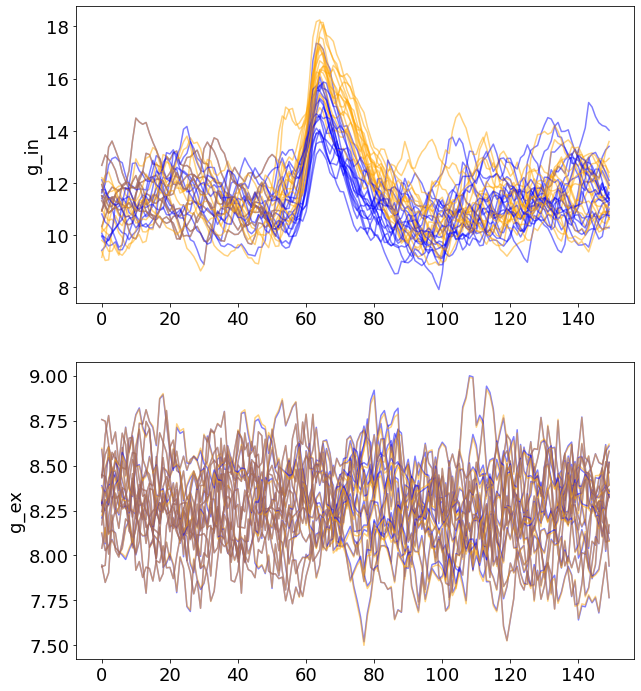

In [8]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, axes = plt.subplots(2,1,figsize=(10,12))
ax1, ax2 = axes
for seed in range(1,10):
    dat_SST = get_data('control3t_full_long', seed, 'SOM', 0.02)
    dat_PV = get_data('control3t_full_long', seed, 'PV', 0.02)
    t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
    t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)

    all_ex_sst.append(g_ex_sst [ 550:700].copy())
    all_ex_sst.append(g_ex_sst [ 1550:1700].copy())
    all_in_sst.append(g_in_sst [ 550:700].copy())
    all_in_sst.append(g_in_sst [ 1550:1700].copy())
    
    all_ex_pv.append(g_ex_pv [ 550:700].copy())
    all_ex_pv.append(g_ex_pv [ 1550:1700].copy())
    all_in_pv.append(g_in_pv [ 550:700].copy())
    all_in_pv.append(g_in_pv [ 1550:1700].copy())

    
    ax1.plot(all_in_pv[-1],c='blue', alpha=0.5)
    ax1.plot(all_in_pv[-2],c='blue', alpha=0.5)
    ax1.plot(all_in_sst[-1],c='orange', alpha=0.5)
    ax1.plot(all_in_sst[-2],c='orange', alpha=0.5)
    
    ax2.plot(all_ex_pv[-1],c='blue', alpha=0.5)
    ax2.plot(all_ex_pv[-2],c='blue', alpha=0.5)
    ax2.plot(all_ex_sst[-1],c='orange', alpha=0.5)
    ax2.plot(all_ex_sst[-2],c='orange', alpha=0.5)
    
    dat[ni]['g_in']
    
    # plt.plot(t,g_ex_pv)
    
    
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)

ax1.set_ylabel('g_in')
ax2.set_ylabel('g_ex')

plt.show()

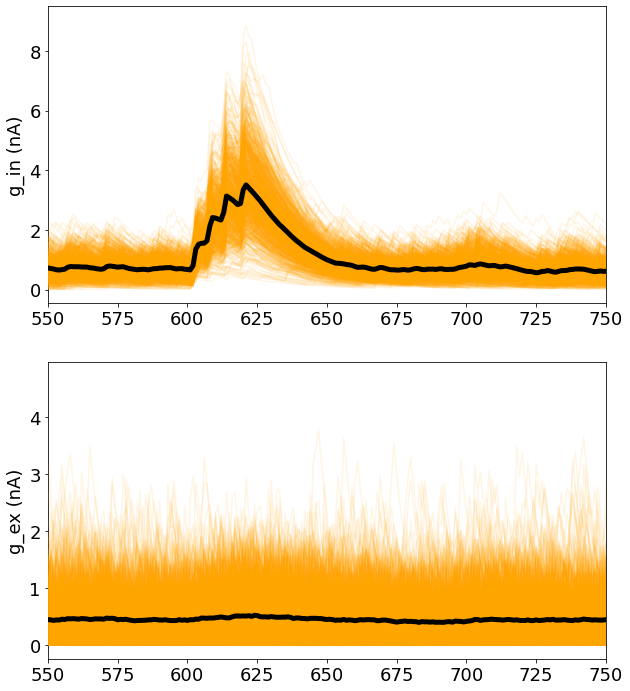

In [30]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, axes = plt.subplots(2,1,figsize=(10,12))
ax1, ax2 = axes
for seed in range(51,52):
    dat_SST = get_data_d('control3t_full', seed, 'SOM', 0.02)
    dat_PV = get_data_d('control3t_full', seed, 'PV', 0.02)
    t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
    t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)

#     all_ex_sst.append(g_ex_sst [ 550:700].copy())
#     all_ex_sst.append(g_ex_sst [ 1550:1700].copy())
#     all_in_sst.append(g_in_sst [ 550:700].copy())
#     all_in_sst.append(g_in_sst [ 1550:1700].copy())
    
#     all_ex_pv.append(g_ex_pv [ 550:700].copy())
#     all_ex_pv.append(g_ex_pv [ 1550:1700].copy())
#     all_in_pv.append(g_in_pv [ 550:700].copy())
#     all_in_pv.append(g_in_pv [ 1550:1700].copy())

    tlen = len(t)
    
    g_in_pv, g_ex_pv, g_in_sst, g_ex_sst = np.zeros(tlen), np.zeros(tlen), np.zeros(tlen), np.zeros(tlen)
    
    NPV, NSST= 0, 0
    for di, dd in enumerate(dat_PV):
#         ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di) 
#         ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di)
        g_in_pv += -dd['g_in']*dd['V_m']/1000
        g_ex_pv += -dd['g_ex']*dd['V_m']/1000
        NPV+=1
    for di, dd in enumerate(dat_SST):
        ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        g_in_sst += -dd['g_in']*dd['V_m']/1000
        g_ex_sst += -dd['g_ex']*dd['V_m']/1000
        NSST+=1
    g_in_sst = g_in_sst
    
    
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)
ax1.plot(t, g_in_sst/NSST,c='black', alpha=1, zorder=1000, lw=5)
ax2.plot(t, g_ex_sst/NSST,c='black', alpha=1, zorder=1000, lw=5)
# ax1.plot(t, g_in_pv/NPV,c='blue', alpha=1, zorder=1000, lw=5)
# ax2.plot(t, g_ex_pv/NPV,c='blue', alpha=1, zorder=1000, lw = 5)
ax1.set_ylabel('g_in (nA)')
ax2.set_ylabel('g_ex (nA)')
ax1.set_xlim(550,750)
ax2.set_xlim(550,750)

plt.show()

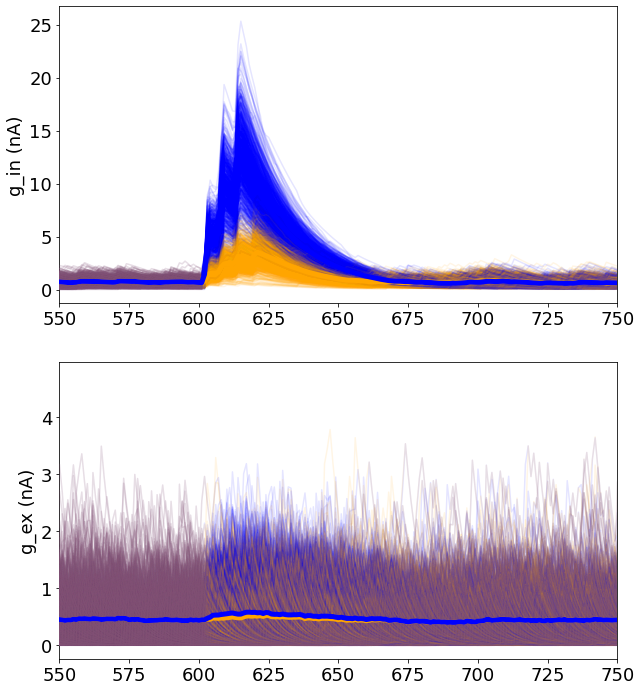

In [27]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, axes = plt.subplots(2,1,figsize=(10,12))
ax1, ax2 = axes
for seed in range(51,52):
    dat_SST = get_data_d('control3t_full', seed, 'SOM', 0.02)
    dat_PV = get_data_d('control3t_full', seed, 'PV', 0.02)
    t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
    t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)

#     all_ex_sst.append(g_ex_sst [ 550:700].copy())
#     all_ex_sst.append(g_ex_sst [ 1550:1700].copy())
#     all_in_sst.append(g_in_sst [ 550:700].copy())
#     all_in_sst.append(g_in_sst [ 1550:1700].copy())
    
#     all_ex_pv.append(g_ex_pv [ 550:700].copy())
#     all_ex_pv.append(g_ex_pv [ 1550:1700].copy())
#     all_in_pv.append(g_in_pv [ 550:700].copy())
#     all_in_pv.append(g_in_pv [ 1550:1700].copy())

    tlen = len(t)
    
    g_in_pv, g_ex_pv, g_in_sst, g_ex_sst = np.zeros(tlen), np.zeros(tlen), np.zeros(tlen), np.zeros(tlen)
    
    NPV, NSST= 0, 0
    for di, dd in enumerate(dat_PV):
        ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di) 
        ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di)
        g_in_pv += -dd['g_in']*dd['V_m']/1000
        g_ex_pv += -dd['g_ex']*dd['V_m']/1000
        NPV+=1
    for di, dd in enumerate(dat_SST):
        ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        g_in_sst += -dd['g_in']*dd['V_m']/1000
        g_ex_sst += -dd['g_ex']*dd['V_m']/1000
        NSST+=1
    g_in_sst = g_in_sst
    
    
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)
ax1.plot(t, g_in_sst/NSST,c='orange', alpha=1, zorder=1000, lw=5)
ax2.plot(t, g_ex_sst/NSST,c='orange', alpha=1, zorder=1000, lw=5)
ax1.plot(t, g_in_pv/NPV,c='blue', alpha=1, zorder=1000, lw=5)
ax2.plot(t, g_ex_pv/NPV,c='blue', alpha=1, zorder=1000, lw = 5)
ax1.set_ylabel('g_in (nA)')
ax2.set_ylabel('g_ex (nA)')
ax1.set_xlim(550,750)
ax2.set_xlim(550,750)

plt.show()

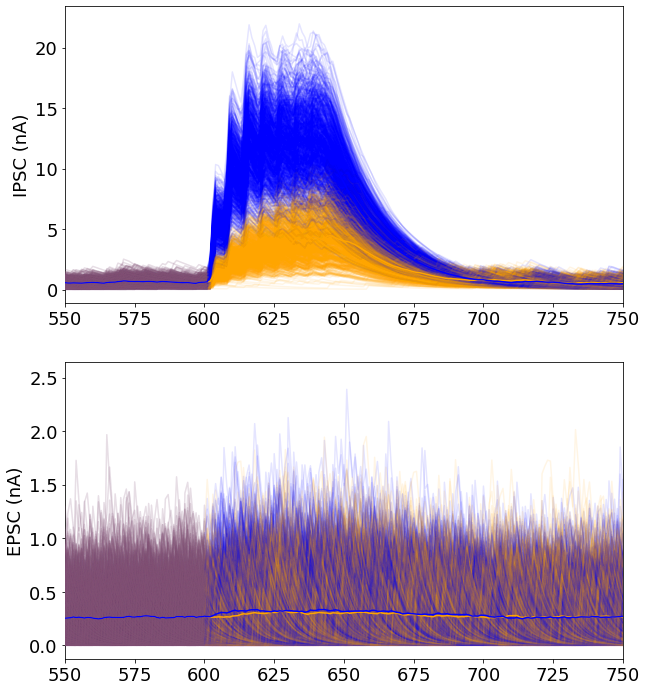

In [33]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, axes = plt.subplots(2,1,figsize=(10,12))
ax1, ax2 = axes
for seed in range(5,6):
    dat_SST = get_data_d('control3t_full_long', seed, 'SOM', 0.02)
    dat_PV = get_data_d('control3t_full_long', seed, 'PV', 0.02)
    t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
    t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)

#     all_ex_sst.append(g_ex_sst [ 550:700].copy())
#     all_ex_sst.append(g_ex_sst [ 1550:1700].copy())
#     all_in_sst.append(g_in_sst [ 550:700].copy())
#     all_in_sst.append(g_in_sst [ 1550:1700].copy())
    
#     all_ex_pv.append(g_ex_pv [ 550:700].copy())
#     all_ex_pv.append(g_ex_pv [ 1550:1700].copy())
#     all_in_pv.append(g_in_pv [ 550:700].copy())
#     all_in_pv.append(g_in_pv [ 1550:1700].copy())

    tlen = len(t)
    
    g_in_pv, g_ex_pv, g_in_sst, g_ex_sst = np.zeros(tlen), np.zeros(tlen), np.zeros(tlen), np.zeros(tlen)
    
    NPV, NSST= 0, 0
    for di, dd in enumerate(dat_PV):
        ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di) 
        ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di)
        g_in_pv += -dd['g_in']*dd['V_m']/1000
        g_ex_pv += -dd['g_ex']*dd['V_m']/1000
        NPV+=1
    for di, dd in enumerate(dat_SST):
        ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        g_in_sst += -dd['g_in']*dd['V_m']/1000
        g_ex_sst += -dd['g_ex']*dd['V_m']/1000
        NSST+=1
    g_in_sst = g_in_sst
    
    
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)
ax1.plot(t, g_in_sst/NSST,c='orange', alpha=1, zorder=1000)
ax2.plot(t, g_ex_sst/NSST,c='orange', alpha=1, zorder=1000)
ax1.plot(t, g_in_pv/NPV,c='blue', alpha=1, zorder=1000)
ax2.plot(t, g_ex_pv/NPV,c='blue', alpha=1, zorder=1000)
ax1.set_ylabel('IPSC (nA)')
ax2.set_ylabel('EPSC (nA)')
ax1.set_xlim(550,750)
ax2.set_xlim(550,750)

plt.show()

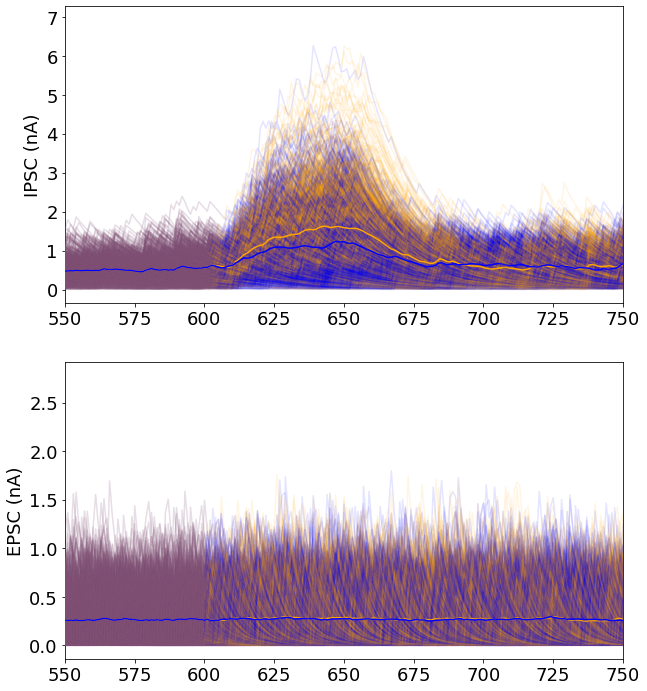

In [34]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, axes = plt.subplots(2,1,figsize=(10,12))
ax1, ax2 = axes
for seed in range(5,6):
    dat_SST = get_data('control3t_full_long', seed, 'SOM', 0.02)
    dat_PV = get_data('control3t_full_long', seed, 'PV', 0.02)
    t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
    t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)

#     all_ex_sst.append(g_ex_sst [ 550:700].copy())
#     all_ex_sst.append(g_ex_sst [ 1550:1700].copy())
#     all_in_sst.append(g_in_sst [ 550:700].copy())
#     all_in_sst.append(g_in_sst [ 1550:1700].copy())
    
#     all_ex_pv.append(g_ex_pv [ 550:700].copy())
#     all_ex_pv.append(g_ex_pv [ 1550:1700].copy())
#     all_in_pv.append(g_in_pv [ 550:700].copy())
#     all_in_pv.append(g_in_pv [ 1550:1700].copy())

    tlen = len(t)
    
    g_in_pv, g_ex_pv, g_in_sst, g_ex_sst = np.zeros(tlen), np.zeros(tlen), np.zeros(tlen), np.zeros(tlen)
    
    NPV, NSST= 0, 0
    for di, dd in enumerate(dat_PV):
        ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di) 
        ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='blue', alpha=0.1, zorder=di)
        g_in_pv += -dd['g_in']*dd['V_m']/1000
        g_ex_pv += -dd['g_ex']*dd['V_m']/1000
        NPV+=1
    for di, dd in enumerate(dat_SST):
        ax1.plot(t, -dd['g_in']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        ax2.plot(t, -dd['g_ex']*dd['V_m']/1000,c='orange', alpha=0.1, zorder=di)
        g_in_sst += -dd['g_in']*dd['V_m']/1000
        g_ex_sst += -dd['g_ex']*dd['V_m']/1000
        NSST+=1
    g_in_sst = g_in_sst
    
    
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)
ax1.plot(t, g_in_sst/NSST,c='orange', alpha=1, zorder=1000)
ax2.plot(t, g_ex_sst/NSST,c='orange', alpha=1, zorder=1000)
ax1.plot(t, g_in_pv/NPV,c='blue', alpha=1, zorder=1000)
ax2.plot(t, g_ex_pv/NPV,c='blue', alpha=1, zorder=1000)
ax1.set_ylabel('IPSC (nA)')
ax2.set_ylabel('EPSC (nA)')
ax1.set_xlim(550,750)
ax2.set_xlim(550,750)

plt.show()

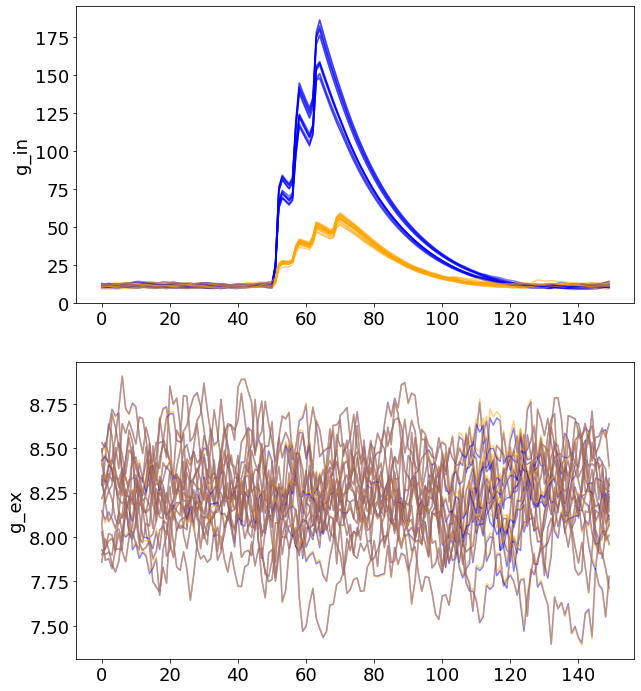

In [37]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, axes = plt.subplots(2,1,figsize=(10,12))
ax1, ax2 = axes
for seed in range(51,60):
    dat_SST = get_data_d('control3t_full', seed, 'SOM', 0.02)
    dat_PV = get_data_d('control3t_full', seed, 'PV', 0.02)
    t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
    t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)

    all_ex_sst.append(g_ex_sst [ 550:700].copy())
    all_ex_sst.append(g_ex_sst [ 1550:1700].copy())
    all_in_sst.append(g_in_sst [ 550:700].copy())
    all_in_sst.append(g_in_sst [ 1550:1700].copy())
    
    all_ex_pv.append(g_ex_pv [ 550:700].copy())
    all_ex_pv.append(g_ex_pv [ 1550:1700].copy())
    all_in_pv.append(g_in_pv [ 550:700].copy())
    all_in_pv.append(g_in_pv [ 1550:1700].copy())

    
    ax1.plot(all_in_pv[-1],c='blue', alpha=0.5)
    ax1.plot(all_in_pv[-2],c='blue', alpha=0.5)
    ax1.plot(all_in_sst[-1],c='orange', alpha=0.5)
    ax1.plot(all_in_sst[-2],c='orange', alpha=0.5)
    
    ax2.plot(all_ex_pv[-1],c='blue', alpha=0.5)
    ax2.plot(all_ex_pv[-2],c='blue', alpha=0.5)
    ax2.plot(all_ex_sst[-1],c='orange', alpha=0.5)
    ax2.plot(all_ex_sst[-2],c='orange', alpha=0.5)
    
    
    
    # plt.plot(t,g_ex_pv)
    
    
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)

ax1.set_ylabel('g_in')
ax2.set_ylabel('g_ex')

plt.show()

In [40]:
dat_SST[0]

{'g_ex': array([0.        , 0.        , 0.        , ..., 0.27038475, 0.22887575,
        0.19373914]),
 'g_in': array([ 0.        ,  0.        ,  0.        , ..., 13.76948318,
        13.09793757, 12.45914361]),
 'senders': array([9, 9, 9, ..., 9, 9, 9]),
 'times': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 3.097e+03, 3.098e+03,
        3.099e+03]),
 'V_m': array([-64.7006405 , -65.04241283, -65.36214319, ..., -68.2023697 ,
        -68.59516766, -68.93759344])}

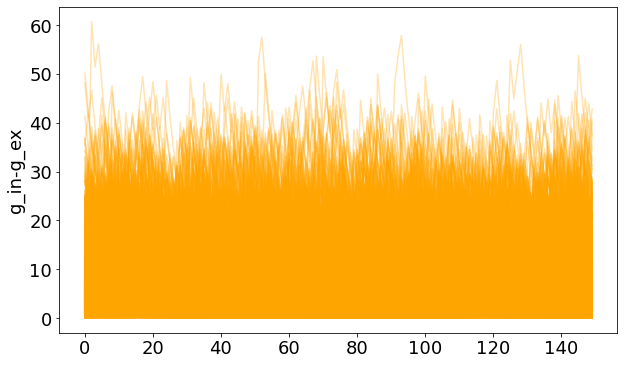

In [45]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, ax1 = plt.subplots(1,1,figsize=(10,6))
# ax1, ax2 = axes
for seed in range(1,2):
    dat_SST = get_data('control3t_full', seed, 'SOM', 0.02)
    dat_PV = get_data('control3t_full', seed, 'PV', 0.02)

    for dd in dat_SST:
        ax1.plot(dd['g_ex'][550:700], c='orange', alpha=0.3)
#     for dd in dat_PV:
#         ax1.plot(dd['g_ex'][550:700], c='blue', alpha=0.3)
        
    
    
    # plt.plot(t,g_ex_pv)
    
    
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)

ax1.set_ylabel('g_in-g_ex')
# ax2.set_ylabel('g_ex')

plt.show()

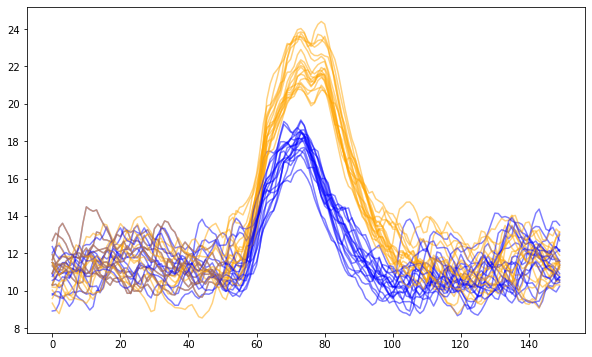

In [31]:
all_ex_sst, all_in_sst =[],[]
all_ex_pv, all_in_pv = [],[]

fig, ax = plt.subplots(figsize=(10,6))
for seed in range(1,10):
    dat_SST = get_data('control3t_full', seed, 'SOM', 0.02)
    dat_PV = get_data('control3t_full', seed, 'PV', 0.02)
    t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
    t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)

    all_ex_sst.append(g_ex_sst [ 550:700].copy())
    all_ex_sst.append(g_ex_sst [ 1550:1700].copy())
    all_in_sst.append(g_in_sst [ 550:700].copy())
    all_in_sst.append(g_in_sst [ 1550:1700].copy())
    
    all_ex_pv.append(g_ex_pv [ 550:700].copy())
    all_ex_pv.append(g_ex_pv [ 1550:1700].copy())
    all_in_pv.append(g_in_pv [ 550:700].copy())
    all_in_pv.append(g_in_pv [ 1550:1700].copy())

    
    plt.plot(all_in_pv[-1],c='blue', alpha=0.5)
    plt.plot(all_in_pv[-2],c='blue', alpha=0.5)
    plt.plot(all_in_sst[-1],c='orange', alpha=0.5)
    plt.plot(all_in_sst[-2],c='orange', alpha=0.5)
    # plt.plot(t,g_ex_pv)
    # plt.plot(t,g_ex_sst)

#     plt.xlim(1550,1800)
plt.show()

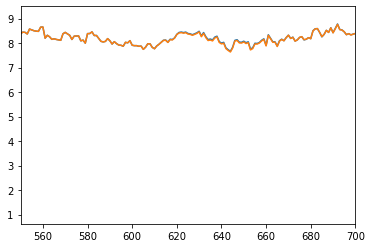

In [12]:

dat_SST = get_data('control3t_full', 3, 'SOM', 0.02)
dat_PV = get_data('control3t_full', 3, 'PV', 0.02)
t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)


plt.plot(t,g_ex_pv)
plt.plot(t,g_ex_sst)

plt.xlim(550,700)
plt.show()

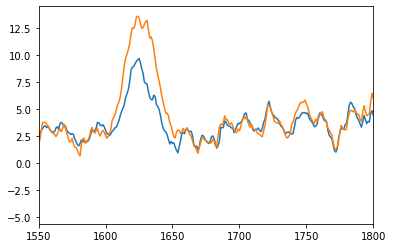

In [7]:

dat_SST = get_data('control3t_full', 3, 'SOM', 0.02)
dat_PV = get_data('control3t_full', 3, 'PV', 0.02)
t, g_ex_sst, g_in_sst = get_average_cond(dat_SST)
t, g_ex_pv, g_in_pv = get_average_cond(dat_PV)


plt.plot(t,g_in_pv-g_ex_pv)
plt.plot(t,g_in_sst-g_ex_sst)
# plt.plot(t,g_ex_pv)
# plt.plot(t,g_ex_sst)

plt.xlim(1550,1800)
plt.show()